In [ ]:
! pip install transformers
! pip install torch

In [ ]:
import torch 
import re 
from transformers import AutoTokenizer, ViTFeatureExtractor, VisionEncoderDecoderModel 
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
device='cuda'
encoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
decoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
model_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
feature_extractor = ViTFeatureExtractor.from_pretrained(encoder_checkpoint)
tokenizer = AutoTokenizer.from_pretrained(decoder_checkpoint)
model = VisionEncoderDecoderModel.from_pretrained(model_checkpoint).to(device)

# Save Model Pre Trained
# "nlpconnect/vit-gpt2-image-captioning"
# feature_extractor.save_pretrained('./pretrained/')
# tokenizer.save_pretrained('./pretrained/')
# model.save_pretrained('./pretrained/')

In [ ]:
def predict(image, max_length=64, num_beams=4):
    image = image.convert('RGB')
    image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)
    clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
    caption_ids = model.generate(image, max_length = max_length)[0]
    caption_text = clean_text(tokenizer.decode(caption_ids))
    return caption_text 

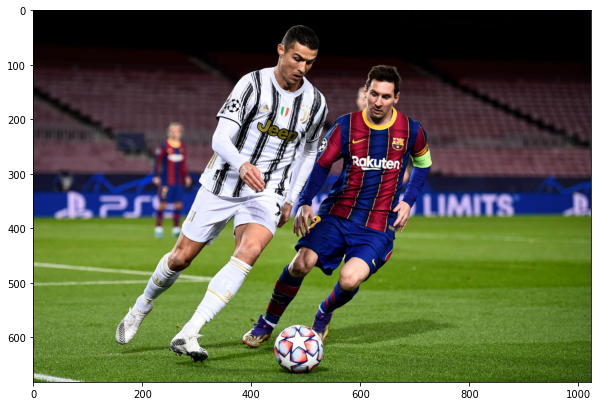

'two soccer players are playing soccer on a field '

In [ ]:
img_path = "example1.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

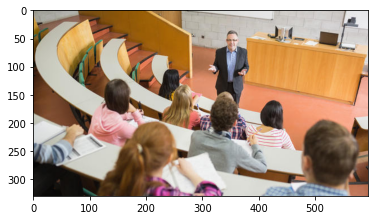

'a man in a suit is speaking to a group of people '

In [ ]:
img_path = "example2.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

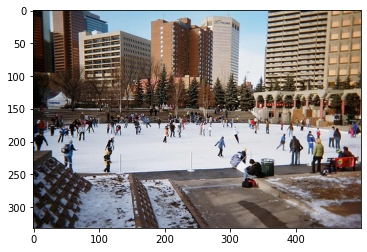

'a large group of people are snowboarding in a park '

In [ ]:
img_path = "example3.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

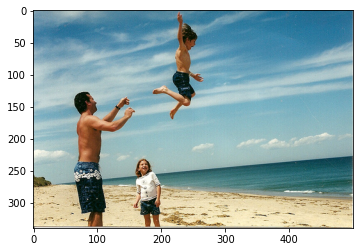

'a man and a boy jumping up into the air on a beach '

In [ ]:
img_path = "example4.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

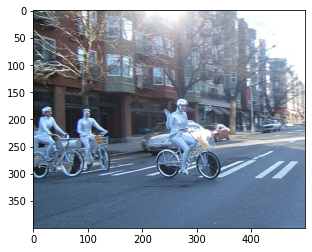

'a parade of people riding bicycles down a street '

In [ ]:
img_path = "example5.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

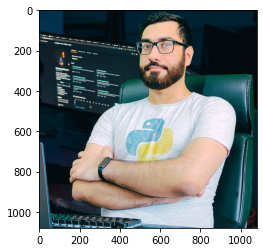

'a man with glasses sitting in front of a computer '

In [ ]:
img_path = "example6.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

### Image Captioning with url

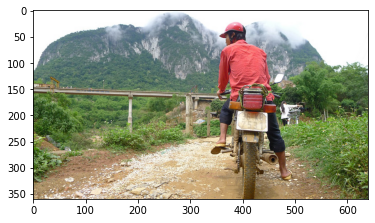

'a man riding a motorcycle on a dirt road '

In [ ]:
import requests

url = "http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg"
image = Image.open(requests.get(url, stream=True).raw)
caption = predict(image)
plt.imshow(image)
plt.show()
caption


# Test on COCO Validation Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/data-sets/coco-caption')

In [ ]:
import json
import requests

f = open('/content/drive/MyDrive/data-sets/coco-caption/annotations/captions_val2014.json')
dataset = json.load(f)

results = []
selected_img = 0
while not selected_img == 2000:
  img_url = dataset.get("images")[selected_img].get("url")
  image_id = dataset.get("images")[selected_img].get("id")
  try:
    image = Image.open(requests.get(img_url, stream=True).raw)
    caption = predict(image)
    results.append({"image_id": image_id, "caption": caption})
    selected_img += 1
  except: selected_img += 1

In [ ]:
print(results)
print(len(results))

[{'image_id': 391895, 'caption': 'a man riding a motorcycle on a dirt road '}, {'image_id': 522418, 'caption': 'a woman cutting a cake with a knife '}, {'image_id': 184613, 'caption': 'a young boy holding an umbrella while standing in a field '}, {'image_id': 318219, 'caption': 'a young boy is playing on a computer '}, {'image_id': 554625, 'caption': 'a young boy is using a computer while others look on '}, {'image_id': 397133, 'caption': 'a woman in a kitchen with a large counter '}, {'image_id': 574769, 'caption': 'a woman holding a cat in a kitchen '}, {'image_id': 60623, 'caption': 'a girl sitting at a table with a lit candle '}, {'image_id': 309022, 'caption': 'a kitchen with a stove, a sink, and a counter top '}, {'image_id': 5802, 'caption': "a man in a chef's outfit is in a kitchen "}, {'image_id': 222564, 'caption': 'a chef in a kitchen preparing food in a kitchen '}, {'image_id': 118113, 'caption': 'a room with a table and a shelf with books '}, {'image_id': 193271, 'caption'

In [ ]:
import json

# Serializing json
json_object = json.dumps(results, indent=4)

with open("result_coco2014_1678.json", "w") as outfile:
    outfile.write(json_object)

# BLEU Score for image Captioning

 

In [ ]:
human_caption = []
vit_caption = []

for img in results:
    human_caption_selected_img = []
    vit_caption.append(img["caption"])
    for item in dataset['annotations']:
        if item["image_id"] == img["image_id"]:
            human_caption_selected_img.append(item["caption"])
    human_caption.append(human_caption_selected_img)
    selected_img += 1

In [ ]:
human_caption

[['A man with a red helmet on a small moped on a dirt road. ',
  'Man riding a motor bike on a dirt road on the countryside.',
  'A man riding on the back of a motorcycle.',
  'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. ',
  'A man in a red shirt and a red hat is on a motorcycle on a hill side.'],
 ['A woman wearing a net on her head cutting a cake. ',
  'A woman cutting a large white sheet cake.',
  'A woman wearing a hair net cutting a large sheet cake.',
  'there is a woman that is cutting a white cake',
  "A woman marking a cake with the back of a chef's knife. "],
 ['A child holding a flowered umbrella and petting a yak.',
  'A young man holding an umbrella next to a herd of cattle.',
  'a young boy barefoot holding an umbrella touching the horn of a cow',
  'A young boy with an umbrella who is touching the horn of a cow.',
  'A boy holding an umbrella while standing next to 

In [ ]:
vit_caption

['a man riding a motorcycle on a dirt road ',
 'a woman cutting a cake with a knife ',
 'a young boy holding an umbrella while standing in a field ',
 'a young boy is playing on a computer ',
 'a young boy is using a computer while others look on ',
 'a woman in a kitchen with a large counter ',
 'a woman holding a cat in a kitchen ',
 'a girl sitting at a table with a lit candle ',
 'a kitchen with a stove, a sink, and a counter top ',
 "a man in a chef's outfit is in a kitchen ",
 'a chef in a kitchen preparing food in a kitchen ',
 'a room with a table and a shelf with books ',
 'a kitchen with a stove, sink, and cabinets ',
 'a kitchen with a sink, toilet and a counter ',
 'a man riding a bicycle past a train ',
 'a kitchen with a stove, refrigerator, sink and a microwave ',
 'a kitchen with a table, chairs, and a refrigerator ',
 'a woman eating a bowl of vegetables in a kitchen ',
 'a man on a skateboard doing a trick ',
 'a kitchen with a stove, microwave, and refrigerator ',
 '

In [ ]:
print(human_caption[200])
print(vit_caption[200])

['Several books are stacked on a table. ', 'A set of books sitting on top of a shelf.', 'A few books lined up beside each other on the shelf. ', 'The books are stacked on the shelve on the rack ', 'A shelf with many different types of books.']
a stack of books on top of a shelf 


In [ ]:
len(human_caption), len(vit_caption), len(results)

(1678, 1678, 1678)

### Calculate BLEU Score using NLTK (sentence_bleu)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

sum_blue = 0
for i in range(len(results)):
    reference = []
    for item in human_caption[i]: reference.append(item.split())
    candidate = vit_caption[i].split()
    sum_blue += sentence_bleu(reference, candidate, smoothing_function=SmoothingFunction().method4)
print(f"Average BLEU score -> {sum_blue/len(results)}")

Average BLEU score -> 0.25589140693836127
